In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

## Getting the dataset
Mushroom classification

https://www.kaggle.com/uciml/mushroom-classification/version/1

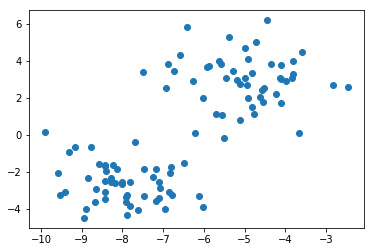

In [220]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2)

# examine the data
plt.scatter(X[:,0],X[:,1])

In [221]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,train_size=0.6)


m, n = shape(X_train) # extract the number of m samples and n features
y_train.shape = (m,1) # adjust y_train dataset shape
Niters = 100

# randomely initialize theta
theta = random.rand(n,1)

In [222]:
def sigmoid(z):
    
    return( divide(1, 1 + power(e,-z)) )
    
def cost(X, y, theta, m, n, L):
    ''' 
    X: features matrix
    y: target vector
    theta: parameters
    m: number of samples
    n: number of features
    L: regularization parameter lambda
    '''
    
    if size(X,1) == size(theta,0):
        thetaTX = matmul(X, theta)
    else:
        X.shape = (m,n)
        thetaTX = matmul(X, theta)
        
    h = sigmoid( thetaTX )
    
    if size(h,0) == size(y,0):
        cost = -y*log(h)-(1-y)*log(1-h)
        return( -1/m * sum(cost, axis=0) + L/(2*m) * sum(theta, axis=0), h)
    else:
        h.shape = (m,1)
        cost = -y*log(h)-(1-y)*log(1-h)
        return( -1/m * sum(cost, axis=0) + L/(2*m) * sum(theta, axis=0), h )
        
def gradient(X, y, theta, m, n, L, hyp):
        
    Q = subtract(hyp,y) # substitution for better comprehension
    grad = 1/m * ( matmul(transpose(X), Q) ) + L/m * theta
    grad[0,0] = 1/m * ( matmul(transpose(X[:,0]), Q) )
    return( grad )

def gradDescent(grad, theta_old, alpha, y):
    
    m, n =  shape(y)
    
    theta_new = subtract(theta_old, multiply(alpha,grad))
    return(theta_new)

In [252]:
L = 1 # regularization parameter
alpha = 0.01

for n in range(Niters):
    
    J, hTheta = cost(X_train, y_train, theta, m, n, L)
    grad = gradient(X_train, y_train, theta, m, n, L, hTheta)
    theta = gradDescent(grad, theta, alpha, y_train)

In [253]:
v = array([[1,2],[3,4],[5,6]])
w = array([[10,11]])

print(v)
print(w)
matmul(v,transpose(w))


[[1 2]
 [3 4]
 [5 6]]
[[10 11]]


array([[ 32],
       [ 74],
       [116]])

In [254]:
def postproc(y_test, y_predict):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(size(y_test,0)):
        if ( y_test[i] == 1) and (y_predict[i] == 1):
            TP += 1
        elif ( y_test[i] == 0) and (y_predict[i] == 1):
            FP += 1
        elif ( y_test[i] == 1) and (y_predict[i] == 0):
            FN += 1
        elif ( y_test[i] == 0) and (y_predict[i] == 0):
            TN += 1
    acc = (TP + TN) / size(y_test,0)
    prec = TP / (TP + FP)
    recall = (TP) / (TP + FN)
    
    return( acc, prec, recall, TP, FP, FN, TN )

In [255]:
y_predict = sigmoid(matmul(X_test, theta))

for i in range(len(y_test)):
    if y_predict[i] >= 0.5:
        y_predict[i] = 1
    else:
        y_predict[i] = 0

acc, prec, recall, TP, FP, FN, TN = postproc(y_test, y_predict)

print('Accuracy: \n', acc)
print('Precision: \n', prec)
print('Recall: \n', recall)

Accuracy: 
 0.975
Precision: 
 1.0
Recall: 
 0.9629629629629629


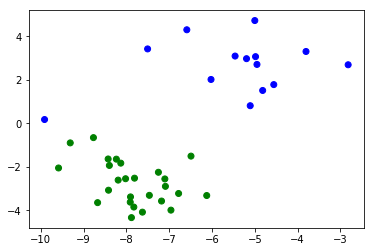

In [256]:
def color(y, color):
    for i in range(size(y,0)):
        if y[i,0] == 1:
            color.append('green')
        else:
            color.append('blue')

c = []

        
plt.scatter(X_test[:,0],X_test[:,1],c=color)

<function matplotlib.pyplot.legend(*args, **kwargs)>

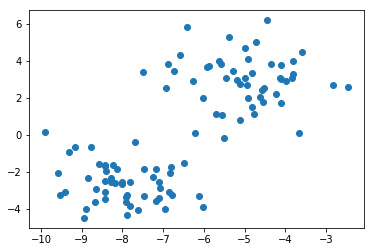

In [260]:
plt.scatter(X[:,0],X[:,1])
#plt.plot(plot_x, plot_y, 'k-', label='Decision Boundary')
plt.legend